# Preliminary exercise: SN data

Instructions for this exercise can be found in the instructions dir

In [2]:
import cmasher as cmr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sn_exercise import SNExercise

## Obtain the theoretical distance modulus

In [3]:
# Set the parameters
redshift = np.linspace(0.1, 2., 1000)
omega_m_values = [0.2, 0.3, 0.4, 0.5]
# Initialise the clas
sn = SNExercise(redshift)

# Obtain the theoretical distance modulus
# for various \Omega_m values
mu_theo = {omega_m: sn.distance_modulus(omega_m=omega_m) for omega_m in omega_m_values}


## Load the observational data 

In [4]:
# Load the observational data
columns = ["z", "mu"]
sn_data = pd.read_csv("data_input/sn_data.txt", delimiter=" ", header=None, names=columns)


## Sample random distance modulii

In [20]:
# Set the parameters
random_redshift = np.random.uniform(0, 2, 20)
h_values = [0.6, 0.7, 0.8]
sn_random = SNExercise(random_redshift)

mu_random = {h: sn_random.distance_modulus(h=h) for h in h_values}
# Generate Gaussian errors with mean=0 and standard deviation (rms)=0.1
mean = 0
rms = 0.1
errors = np.random.normal(loc=mean, scale=rms, size=len(random_redshift))

# Generate Gaussian errors with mean=0 and standard deviation (rms)=0.1 for each h value
mu_with_errors = {h: mu + np.random.normal(loc=mean, scale=rms, size=len(mu)) for h, mu in mu_random.items()}


## Plot

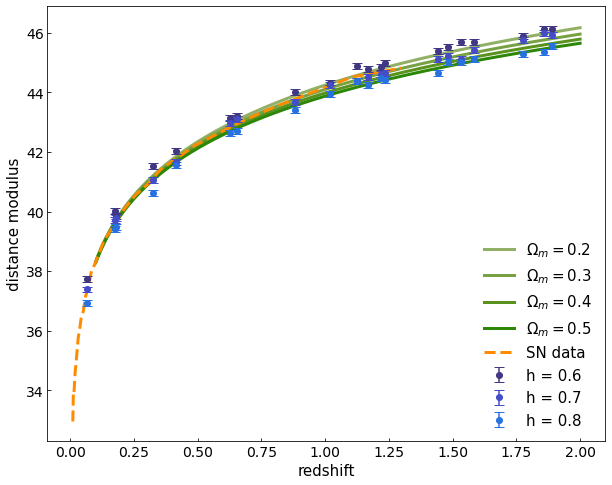

In [45]:
fig = plt.figure(figsize=(10,8))

colors_theo = cmr.take_cmap_colors("cmr.jungle_r", len(omega_m_values), cmap_range=(0.3, 0.5), return_fmt='hex')
colors_rand = cmr.take_cmap_colors("cmr.freeze", len(h_values), cmap_range=(0.3, 0.5), return_fmt='hex')

for i, key in enumerate(mu_theo.keys()):
    plt.plot(redshift, mu_theo[key], c=colors_theo[i], lw=3, label=f"$\Omega_m = {key}$")
    
plt.plot(sn_data["z"], sn_data["mu"], label="SN data", lw=3, ls="--", c="darkorange")

for i, (h, mu_vals) in enumerate(mu_with_errors.items()):
    plt.errorbar(random_redshift, mu_vals, yerr=rms, fmt='o', label=f"h = {h}", capsize=5, color=colors_rand[i])

plt.xlabel("redshift", fontsize=15)
plt.ylabel("distance modulus", fontsize=15)
plt.tick_params(axis='both', direction='in', labelsize=14) 
plt.legend(loc=4, frameon=False, fontsize=15)
plt.savefig(f"plots_output/distance_modulus_exercise.pdf", dpi=300)
